# Binary valued data, i.e. $\mathbb{S}_0$, on line-graph, i.e. $\mathbb{S}_0$-signal

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from scipy.interpolate import CubicSpline
from scipy import optimize
import condat_tv

import imp

In [62]:
import dots

In [63]:
imp.reload(dots)

<module 'dots' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/dots.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Gaussian

standard deviation : sigma = 0.9899494936611666


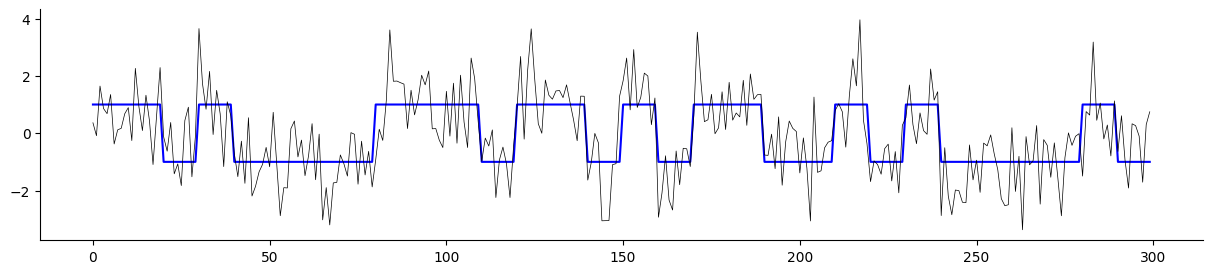

In [257]:
dd, dd_0 = dots.barcode_generator((np.sqrt(2)*0.7)**2, 31, 10)

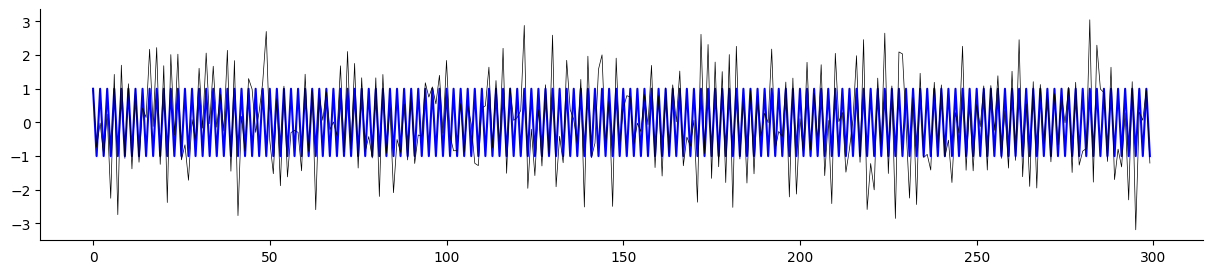

In [236]:
cdd, cdd_0, cddc = dots.gen_sig_counterex(300,(np.sqrt(2)*0.7)**2)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ANISO-TV : solving the complex-valued S_1-model proposed by Condat ...
- GME-TV : solving the complex-valued S_1-model proposed by Condat ...
- TV : solving the state-of-the-art unconstrained TV problem 

In [299]:
r, q_aniso_tv, x1r, x2r = dots.AnisotropicTV(1/2*(1+dd), 1/2*(1+dd_0), 0.8)

In [300]:
q_gme_tv = dots.GME_TV(dd, dd_0, 2.4, 3000)

iter. 	| funv-value 		| RMSE 		| error
-----------------------------------------------------------------
0  	|  328.8037846407685  	|    7.90e+01  	|    1.51e+01
50  	|  384.65305315099965  	|    2.11e+02  	|    4.21e-03
100  	|  384.78535430611885  	|    2.11e+02  	|    5.07e-05
120  	|  384.78655925077214  	|    2.11e+02  	|    9.51e-06


In [301]:
cq_tv_box, cqz = dots.ADMM_TV_BOX(cddc, cdd_0, mu=0.9, rho=0.1, iter=100)

iter. 	| funv-value 		| RMSE 		| error
-----------------------------------------------------------------
0  	|  1150.1999999999985  	|    3.83e+02  	|    3.46e+01
1  	|  1076.52  	|    3.00e+02  	|    1.29e+01
2  	|  826.3199999999999  	|    0.00e+00  	|    1.73e+01
3  	|  826.3199999999999  	|    0.00e+00  	|    0.00e+00


In [302]:
q_tv_box, qz = dots.ADMM_TV_BOX(dd, dd_0, mu=1.9, rho=0.1, iter=100)

iter. 	| funv-value 		| RMSE 		| error
-----------------------------------------------------------------
0  	|  20686.393811998987  	|    2.14e+04  	|    1.61e+02
1  	|  683.9435017577845  	|    3.43e+02  	|    1.31e+02
2  	|  365.5034377986902  	|    2.95e+01  	|    1.70e+01
3  	|  364.0342235803576  	|    2.84e+01  	|    5.75e-01
4  	|  364.3769002217053  	|    2.82e+01  	|    1.97e-01
5  	|  364.79745791790515  	|    2.81e+01  	|    1.97e-01
6  	|  365.2958966689565  	|    2.80e+01  	|    1.97e-01
7  	|  365.7589668230295  	|    2.80e+01  	|    9.30e-02
8  	|  365.46011108998505  	|    2.80e+01  	|    5.88e-02
9  	|  365.3865132087526  	|    2.80e+01  	|    1.47e-02
10  	|  365.3865132087526  	|    2.80e+01  	|    3.08e-14


In [303]:
q_condat_tv = condat_tv.tv_denoise(dd, 2.1)

In [304]:
q = np.sign(dd)

In [305]:
q_gme_tv2 = np.sign(q_gme_tv)

In [306]:
print(' \t\t| fast-Condat-TV \t| SIGN \t\t| fast-ADMM-TV \t| ANISO-TV \t| fast-GME-TV \t| proj-fast-GME-TV')

print('-----------------------------------------------------------------------------------------------------------')
print('RMSE \t\t|',  "%10.4e"%np.sqrt(np.sum((q_condat_tv - dd_0)**2)/300), ' \t\t|', "%10.4e"%np.sqrt(np.sum((q - dd_0)**2)/300), ' \t|', "%10.4e"%np.sqrt(np.sum((np.sign(q_tv_box) - dd_0)**2)/300),' \t|', "%10.4e"%np.sqrt(np.sum((2*(q_aniso_tv-0.5) - dd_0)**2)/300),' \t|', "%10.4e"%np.sqrt(np.sum((q_gme_tv - dd_0)**2)/300), ' \t|', "%10.4e"%np.sqrt(np.sum((q_gme_tv2 - dd_0)**2)/300))
print('MAE  \t\t|',  "%10.4e"%np.sum(np.abs(q_condat_tv - dd_0)/300), ' \t\t|',  "%10.4e"%np.sum(np.abs(q - dd_0)/300), ' \t|', "%10.4e"%np.sum(np.abs(np.sign(q_tv_box) - dd_0)/300), ' \t|',"%10.4e"%np.sum(np.abs(2*(q_aniso_tv-0.5) - dd_0)/300), ' \t|', "%10.4e"%np.sum(np.abs(q_gme_tv - dd_0)/300), ' \t|', "%10.4e"%np.sum(np.abs(q_gme_tv2 - dd_0)/300))
print('MIoU \t\t|',  "%10.4e"%np.nanmean(dots.MIoU_cut(dd_0, q_condat_tv)), ' \t\t|',  "%10.4e"%np.nanmean(dots.MIoU_cut(dd_0, q)), ' \t|', "%10.4e"%np.nanmean(dots.MIoU_cut(dd_0, np.sign(q_tv_box))), ' \t|',"%10.4e"%np.nanmean(dots.MIoU_cut(dd_0, 2*(q_aniso_tv-0.5))), ' \t|', "%10.4e"%np.nanmean(dots.MIoU_cut(dd_0, q_gme_tv)), ' \t|', "%10.4e"%np.nanmean(dots.MIoU_cut(dd_0, q_gme_tv2)))

 		| fast-Condat-TV 	| SIGN 		| fast-ADMM-TV 	| ANISO-TV 	| fast-GME-TV 	| proj-fast-GME-TV
-----------------------------------------------------------------------------------------------------------
RMSE 		| 5.0697e-01  		| 8.0829e-01  	| 3.0551e-01  	| 3.8297e-01  	| 8.3928e-01  	| 4.6188e-01
MAE  		| 4.0416e-01  		| 3.2667e-01  	| 4.6667e-02  	| 7.3333e-02  	| 5.7692e-01  	| 1.0667e-01


MIoU 		| 1.2731e-03  		| 7.1836e-01  	| 9.5414e-01  	| 9.2900e-01  	| 0.0000e+00  	| 8.9768e-01


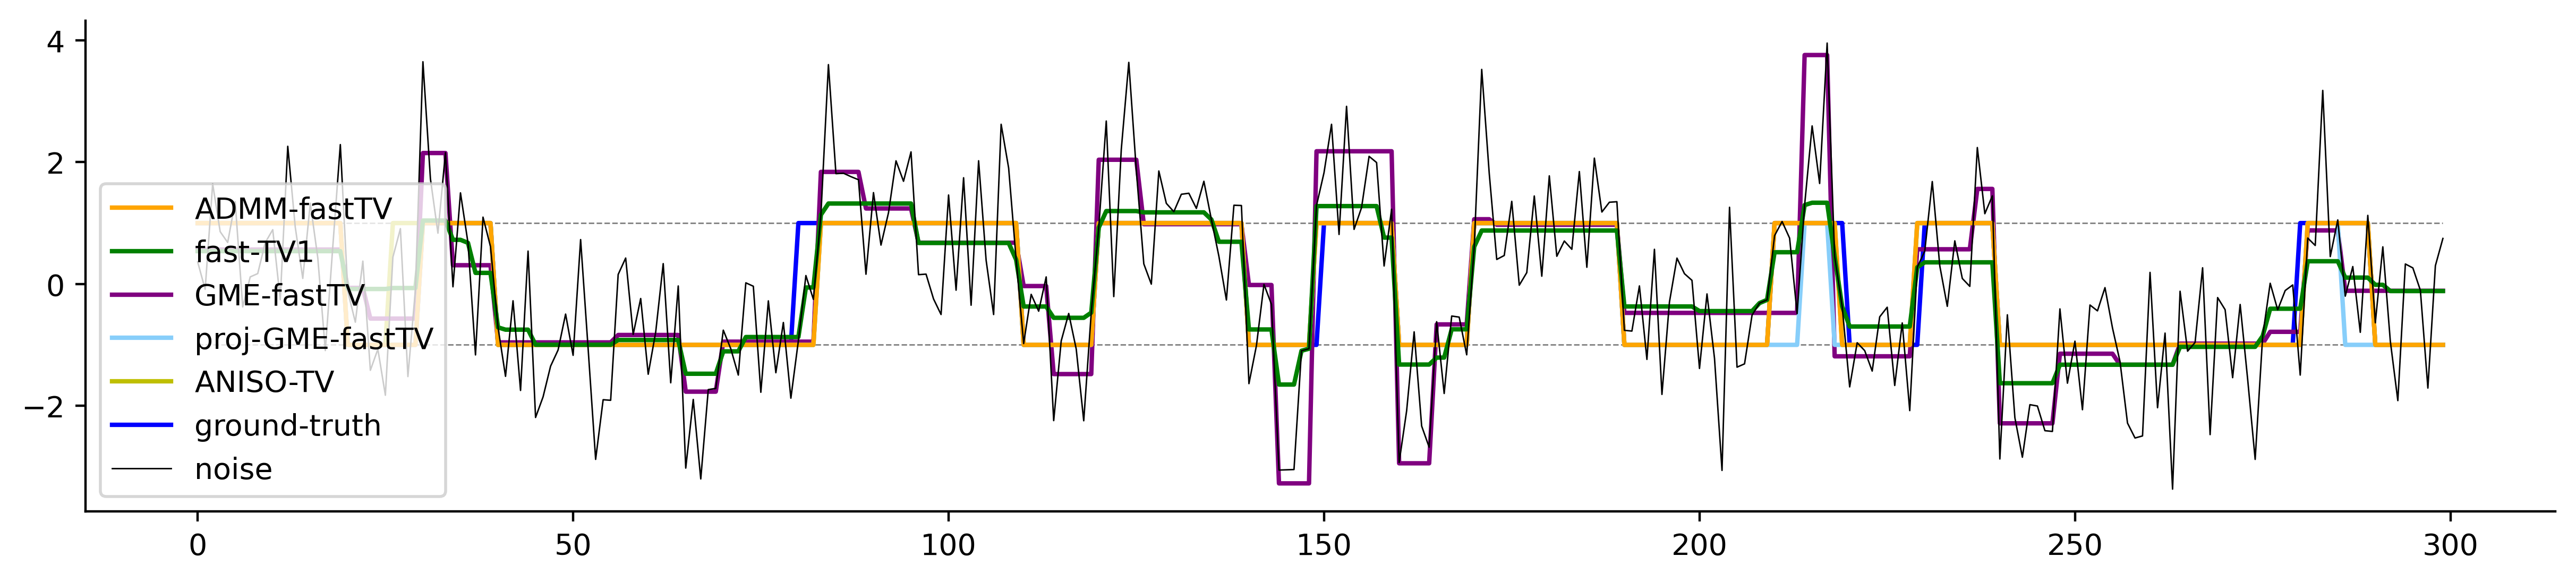

In [307]:
plt.figure(1,figsize=(15,3), dpi=400)
plt.plot(np.ones(300), '--', color='gray', linewidth=0.5)
plt.plot(-np.ones(300), '--', color='gray', linewidth=0.5)
p5, = plt.plot(dd_0, 'b')
p4, = plt.plot((q_aniso_tv-0.5)*2, 'y')
#plt.plot(q_tv, 'r')
p3, = plt.plot(q_gme_tv, 'purple')
p32, = plt.plot(q_gme_tv2, 'lightskyblue')
p1, = plt.plot(q_tv_box, 'orange')
p2, = plt.plot(q_condat_tv, 'g')
#p11, = plt.plot(q_tv_approx, 'peachpuff')
p6, = plt.plot(dd, 'k', linewidth=0.5)
plt.legend([p1, p2, p3, p32, p4, p5, p6], ['ADMM-fastTV', 'fast-TV1', 'GME-fastTV', 'proj-GME-fastTV', 'ANISO-TV', 'ground-truth','noise'])
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
#plt.savefig('0D_case_example.png',dpi=400)

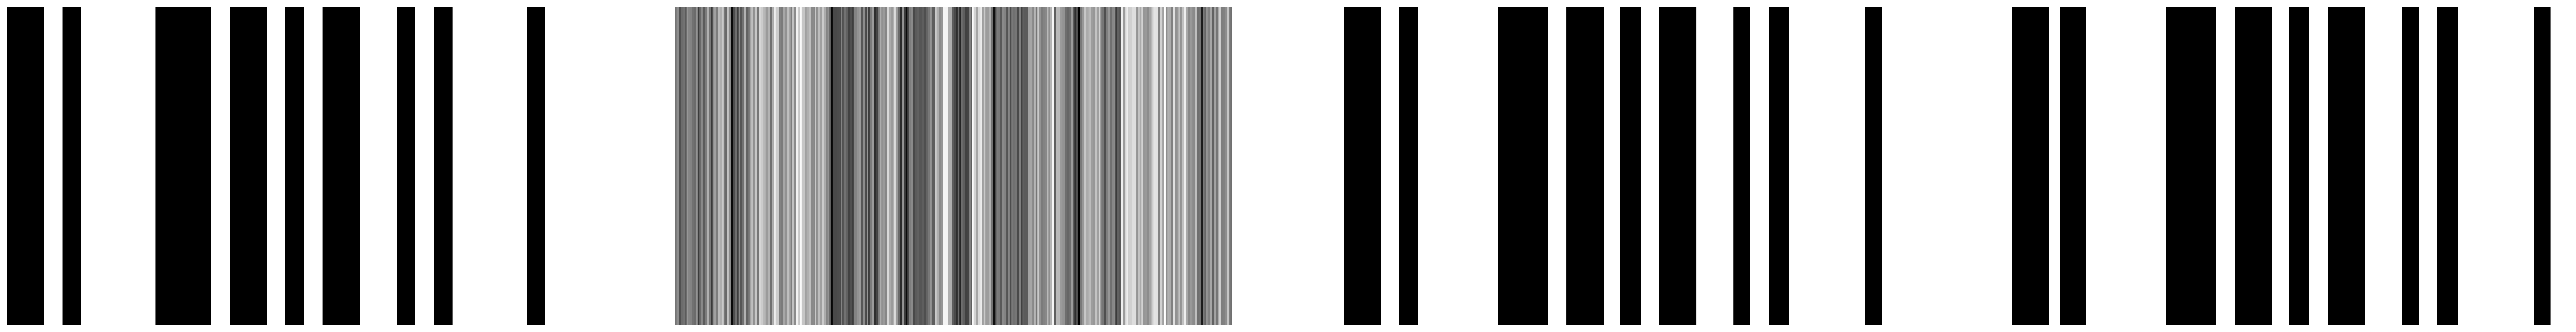

In [308]:
dots.bar_code_plt(dd_0, dd, q_tv_box, q_aniso_tv, 6)